In [212]:
# neccessary imports
import pandas as pd
import numpy as np

In [213]:
# reading the data
data=pd.read_csv('../data/insuranceFraud.csv')

In [214]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [215]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [216]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [217]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [218]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [219]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [220]:
# checking for th number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [221]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [222]:
# imputing the missing values from the column

data['collision_type']=imputer.fit_transform(data['collision_type'])
data['property_damage']=imputer.fit_transform(data['property_damage'])
data['police_report_available']=imputer.fit_transform(data['police_report_available'])

In [223]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy()

In [224]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [225]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [226]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [227]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [228]:
cat_df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [229]:
cat_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [99]:
#cat_df['property_damage'].unique()

In [230]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [231]:
# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [232]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [233]:
# extracting the numerical columns
num_df = data.select_dtypes(include=['int64']).copy()

In [234]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [235]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [236]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [237]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [279]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [210]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

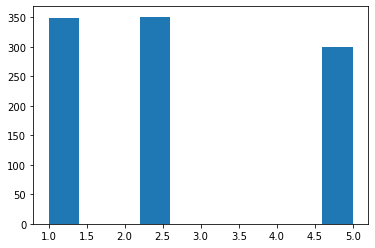

In [122]:
# we'll look at the distribution of data in some columns now
plt.hist(final_df['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

In [130]:
import seaborn as sns

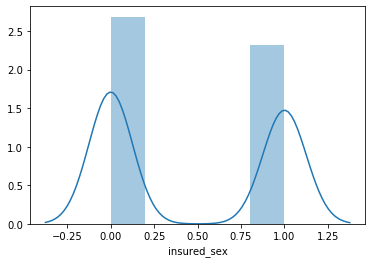

In [132]:
sns.distplot(final_df['insured_sex'])
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

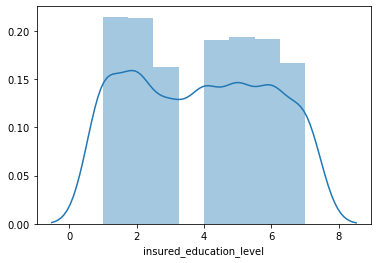

In [133]:
sns.distplot(final_df['insured_education_level'])
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

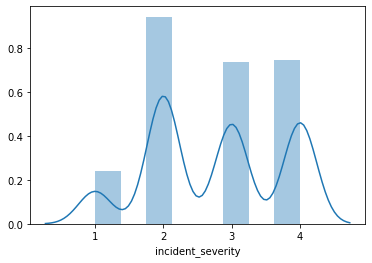

In [134]:
sns.distplot(final_df['incident_severity'])
"""
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""

In [135]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

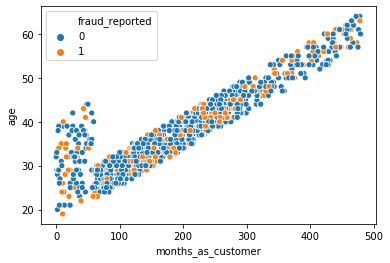

In [137]:
sns.scatterplot(final_df['months_as_customer'],final_df['age'], hue=final_df['fraud_reported'] )
"""
from the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. 
"""

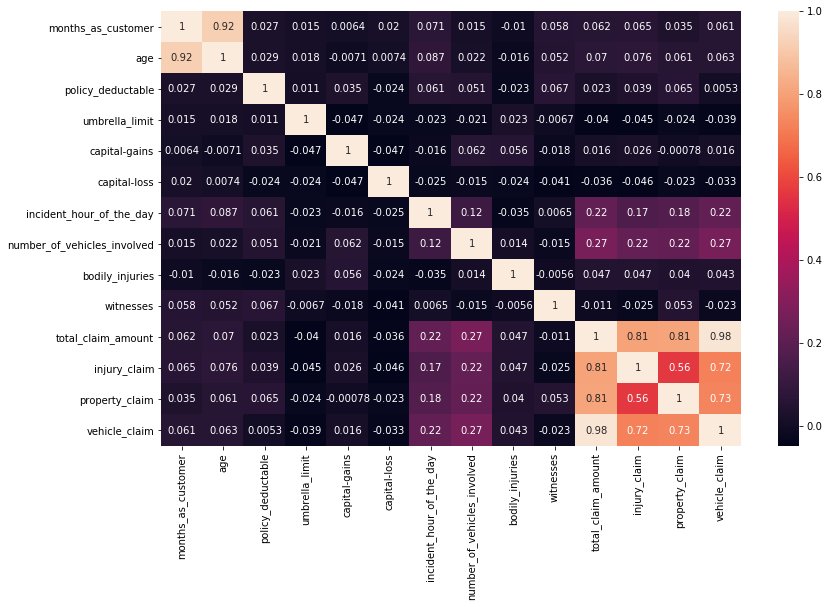

In [143]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [239]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [280]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [294]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [295]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,...,0,0,0,1,1,0,0,1,0,0
595,56,500,0,0,-28800,13,1,1,2,0,...,0,0,1,0,1,0,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,...,0,0,1,0,1,0,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,0,0,0,0,1,0,0,0,1,0


In [296]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [297]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [298]:
print(train_x.shape)
print(num_df.shape)

(750, 45)
(750, 12)


In [299]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [300]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [301]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [302]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

C:\Users\virat\Anaconda3\envs\fraudDetection\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [303]:
train_x.shape

(750, 33)

In [269]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
244,2.5,1,5,1,1,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
595,1.0,1,1,3,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
873,2.5,0,7,3,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
631,5.0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [304]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [292]:
#train_x[:20]

In [306]:
#train_x.isna().sum()

In [307]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC
sv_classifier=SVC()

In [308]:
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)

In [309]:
from sklearn.metrics import accuracy_score

In [310]:
sc=accuracy_score(test_y,y_pred)
sc

0.728

In [311]:
from sklearn.model_selection import GridSearchCV

In [314]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [316]:
grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [317]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.767, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.767, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] . C=0.1, kernel=rbf, random_state=200, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] . C=0.1, kernel=rbf, random_state=200, score=0.760, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] .

[CV]  C=0.5, kernel=sigmoid, random_state=100, score=0.767, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=200 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=200, score=0.760, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=200 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=200, score=0.760, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=200 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=200, score=0.753, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=200 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=200, score=0.753, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=200 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=200, score=0.767, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=300 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=300, score=0.760, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=300 ...........

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [324]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [331]:
from xgboost import XGBClassifier

In [341]:
xgb=XGBClassifier()

In [342]:
y_pred = xgb.fit(train_x, train_y).predict(test_x)

In [343]:
ac2=accuracy_score(test_y,y_pred)
ac2

0.772

In [335]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [336]:
#finding the best parameters
grid.fit(train_x, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   23.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
      

In [337]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)